<img src= 'http://www.bigbang-datascience.com/wp-content/uploads/2017/09/cropped-Logo-01.jpg' width=500/>

Pricing Test (AB testing) Forecasting using time series analysis. Completed as part of course completion with BBDS-Malathy Muthu.


In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
# Disply all Columns
pd.options.display.max_columns=70

### Read the data

Read the data from MySQL that has the TV set as 1 for the price 199 and 0 for the price 299

In [3]:
df_199 = pd.read_csv("Time_series_299o.csv")

In [4]:
df_299 = pd.read_csv("Time_series_299o.csv")

In [5]:
df_199.head()


,promo_date,p_199
0,3/29/2017,598
1,3/30/2017,1196
2,3/31/2017,299
3,4/1/2017,598
4,4/2/2017,3588


In [6]:
df_299.head()

,promo_date,p_199
0,3/29/2017,598
1,3/30/2017,1196
2,3/31/2017,299
3,4/1/2017,598
4,4/2/2017,3588


In [7]:
df_199['promo_date']= pd.to_datetime(df_199['promo_date'])

In [8]:
df_299['promo_date']= pd.to_datetime(df_299['promo_date'])

In [9]:
df_199.index

RangeIndex(start=0, stop=95, step=1)

In [10]:
df_299.index

RangeIndex(start=0, stop=95, step=1)

In [11]:
df_199=df_199.set_index('promo_date')

In [12]:
df_299=df_299.set_index('promo_date')

In [13]:
df_199.index

DatetimeIndex(['2017-03-29', '2017-03-30', '2017-03-31', '2017-04-01',
               '2017-04-02', '2017-04-03', '2017-04-04', '2017-04-05',
               '2017-04-06', '2017-04-07', '2017-04-08', '2017-04-09',
               '2017-04-10', '2017-04-11', '2017-04-12', '2017-04-13',
               '2017-04-14', '2017-04-15', '2017-04-16', '2017-04-17',
               '2017-04-18', '2017-04-19', '2017-04-20', '2017-04-21',
               '2017-04-22', '2017-04-23', '2017-04-24', '2017-04-25',
               '2017-04-26', '2017-04-27', '2017-04-28', '2017-04-29',
               '2017-04-30', '2017-05-01', '2017-05-02', '2017-05-03',
               '2017-05-04', '2017-05-05', '2017-05-06', '2017-05-07',
               '2017-05-08', '2017-05-09', '2017-05-10', '2017-05-11',
               '2017-05-12', '2017-05-13', '2017-05-14', '2017-05-15',
               '2017-05-16', '2017-05-17', '2017-05-18', '2017-05-19',
               '2017-05-20', '2017-05-21', '2017-05-22', '2017-05-23',
      

In [14]:
tb_199 = df_199['p_199']

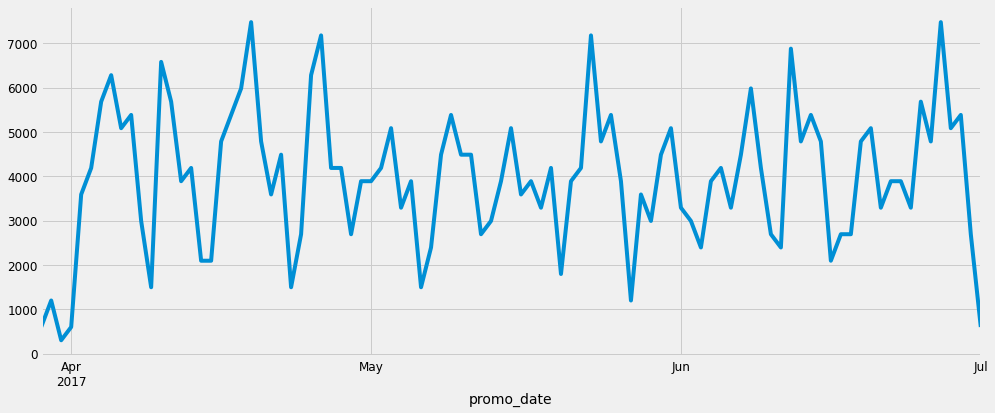

In [17]:
tb_199.plot(figsize=(15, 6))
plt.show()

In [20]:
tb_199_mean = df_199['p_199'].resample('SM').mean()
#tb_299_mean = df_299['p_299'].resample('SM').mean()

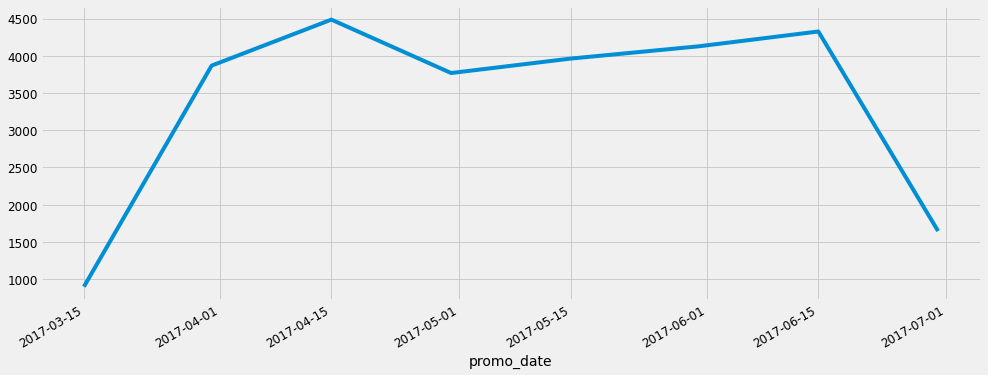

In [21]:
tb_199_mean.plot(figsize=(15, 6))
plt.show()

In [22]:
tb_199_mean

promo_date
2017-03-15     897.000000
2017-03-31    3867.066667
2017-04-15    4485.000000
2017-04-30    3767.400000
2017-05-15    3961.750000
2017-05-31    4126.200000
2017-06-15    4325.533333
2017-06-30    1644.500000
Freq: SM-15, Name: p_199, dtype: float64

In [23]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

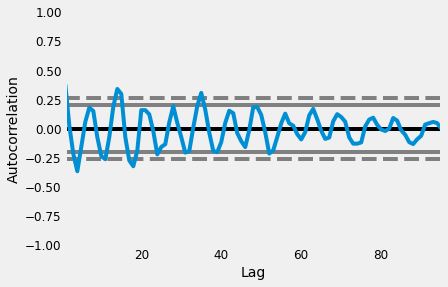

In [24]:
autocorrelation_plot(tb_199)
pyplot.show()


In [27]:
from statsmodels.graphics.tsaplots import plot_pacf

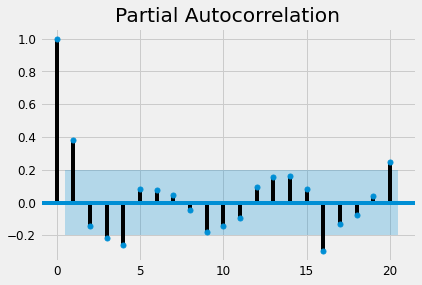

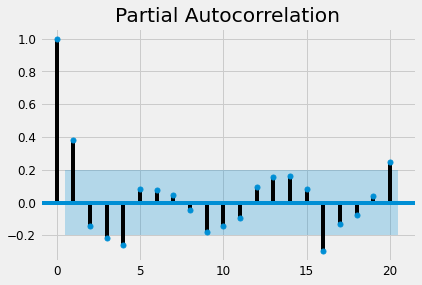

In [28]:
plot_pacf(tb_199 )

In [30]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [31]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [32]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [33]:
from statsmodels.tsa.arima_model import ARIMA

In [34]:
model_199 = ARIMA(tb_199, order = (5, 1, 2))

C:\Users\malat\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malat\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [35]:
model_199_fit = model_199.fit()

In [36]:
print(model_199_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.p_199   No. Observations:                   94
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -813.005
Method:                       css-mle   S.D. of innovations           1340.648
Date:                Tue, 17 Nov 2020   AIC                           1644.010
Time:                        21:16:55   BIC                           1666.900
Sample:                    03-30-2017   HQIC                          1653.256
                         - 07-01-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.5942      5.115      0.507      0.612      -7.431      12.620
ar.L1.D.p_199     0.8029      0.733      1.096      0.273      -0.633       2.239
ar.L2.D.p_199    -0.2123      0.291     

In [37]:
from pandas import DataFrame
residuals_199 = DataFrame(model_199_fit.resid)
residuals_199.head()

,0
promo_date,
2017-03-30,595.405803
2017-03-31,-796.718222
2017-04-01,190.172444
2017-04-02,3009.762270
2017-04-03,1492.972282


In [38]:
model_199_fit.resid

promo_date
2017-03-30     595.405803
2017-03-31    -796.718222
2017-04-01     190.172444
2017-04-02    3009.762270
2017-04-03    1492.972282
                 ...     
2017-06-27    3052.736849
2017-06-28    -277.726826
2017-06-29    1678.639971
2017-06-30   -1280.499936
2017-07-01   -1850.366893
Length: 94, dtype: float64

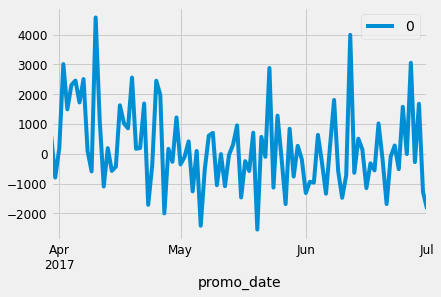

In [39]:
# Plot the residuals (Actuals - Predicted)
residuals_199.plot()

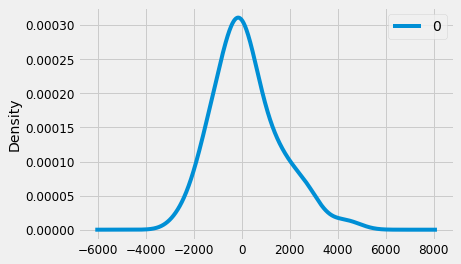

In [40]:
residuals_199.plot(kind ='kde')

In [41]:
residuals_199.describe()

,0
count,94.000000
mean,202.570238
std,1382.778253
min,-2541.596294
25%,-624.602987
50%,-9.684593
75%,928.779891
max,4573.354438


In [42]:
mod_199 = sm.tsa.statespace.SARIMAX(tb_199,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_199 = mod_199.fit()

print(results_199.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3584      0.232      1.543      0.123      -0.097       0.814
ma.L1         -0.9673      0.098     -9.889      0.000      -1.159      -0.776
ar.S.L12      -0.2883      0.177     -1.628      0.103      -0.635       0.059
sigma2      4.981e+06   1.28e+06      3.887      0.000    2.47e+06    7.49e+06


C:\Users\malat\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\malat\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


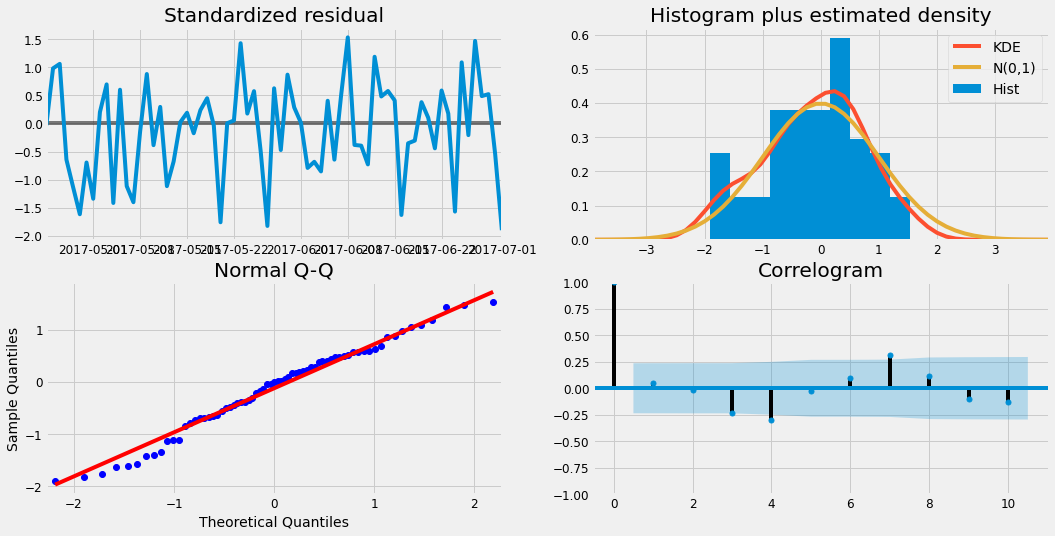

In [43]:
results_199.plot_diagnostics(figsize=(16, 8))
plt.show()

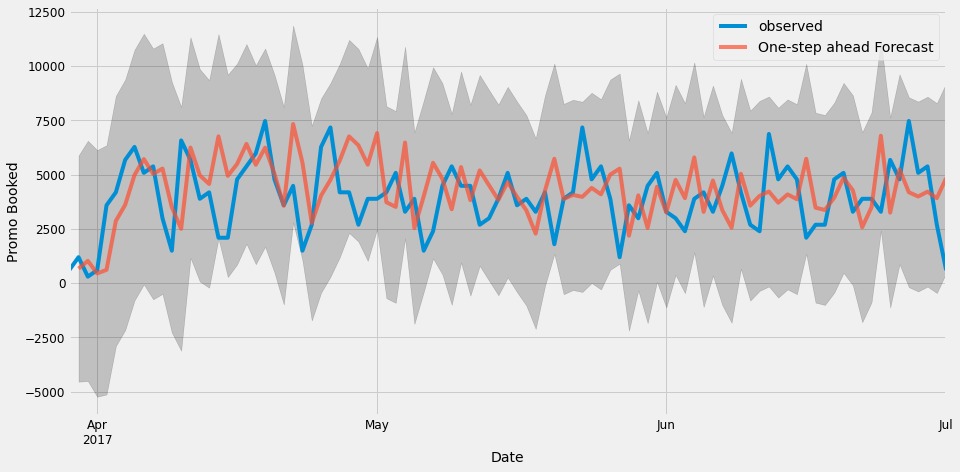

In [44]:
pred_199 = results_199.get_prediction(start=pd.to_datetime('2017-03-30'), dynamic=False)
pred_ci = pred_199.conf_int()

ax = tb_199['2017':].plot(label='observed')
pred_199.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Promo Booked')
plt.legend()

plt.show()

In [45]:
y_199_forecasted = pred_199.predicted_mean
y_199_truth = tb_199['2017-03-30':]

# Compute the mean square error
mse_199 = ((y_199_forecasted - y_199_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_199, 2)))

The Mean Squared Error of our forecasts is 3791012.35


In [46]:
print('The Root Mean Squared Error of our forecasts is {}',np.sqrt(mse_199))

The Root Mean Squared Error of our forecasts is {} 1947.052221218868


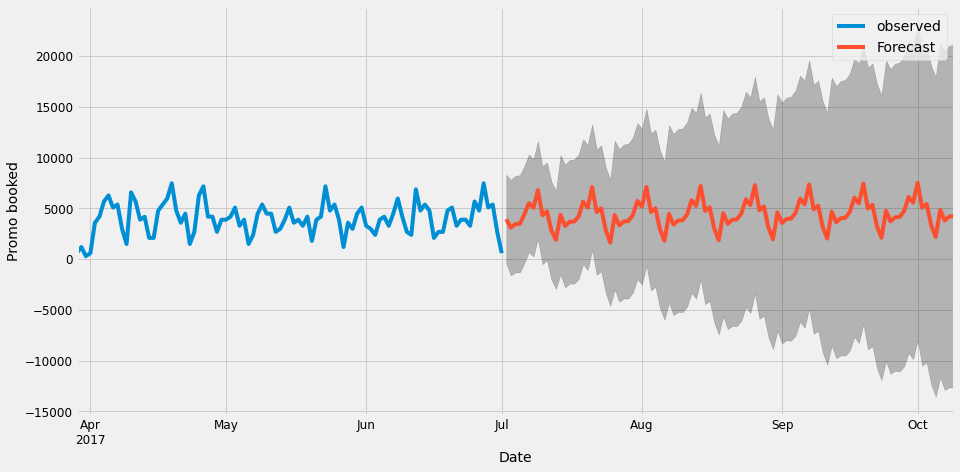

In [47]:
pred_uc = results_199.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = tb_199.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Promo booked')

plt.legend()
plt.show()

In [48]:
#! pip install fbprophet

In [49]:
tb_199

promo_date
2017-03-29     598
2017-03-30    1196
2017-03-31     299
2017-04-01     598
2017-04-02    3588
              ... 
2017-06-27    7475
2017-06-28    5083
2017-06-29    5382
2017-06-30    2691
2017-07-01     598
Name: p_199, Length: 95, dtype: int64

In [50]:
__import__("pandas").__version__ 

'1.1.3'

In [51]:
price_199 =  pd.read_csv("Time_series_199r.csv")
price_299 =  pd.read_csv("Time_series_299r.csv")

In [52]:
price_299

,ds,y
0,3/29/2017,598
1,3/30/2017,1196
2,3/31/2017,299
3,4/1/2017,598
4,4/2/2017,3588
...,...,...
90,6/27/2017,7475
91,6/28/2017,5083
92,6/29/2017,5382
93,6/30/2017,2691


In [53]:
from fbprophet import Prophet

#price_199 = tb_199.rename({"promo_date": "ds", "": "y"},axis='columns')

price_199_model = Prophet(interval_width=0.95)
price_199_model.fit(price_199)

price_299_model = Prophet(interval_width=0.95)
price_299_model.fit(price_299)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
y_199_forecast = price_199_model.make_future_dataframe(periods=36, freq='MS')
y_199_forecast = price_199_model.predict(y_199_forecast)

y_299_forecast = price_299_model.make_future_dataframe(periods=36, freq='MS')
y_299_forecast = price_299_model.predict(y_299_forecast)

<Figure size 1296x432 with 0 Axes>

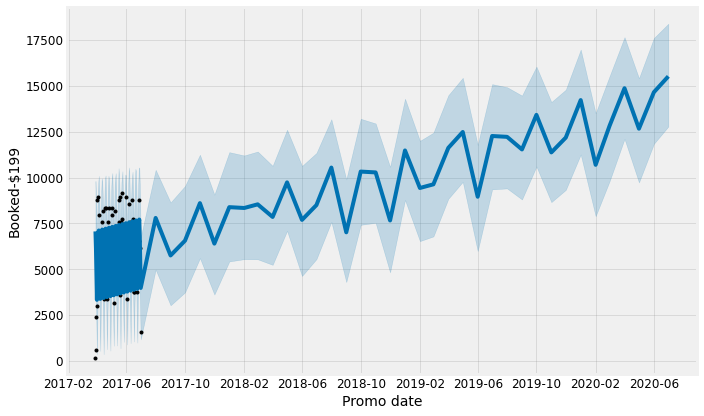

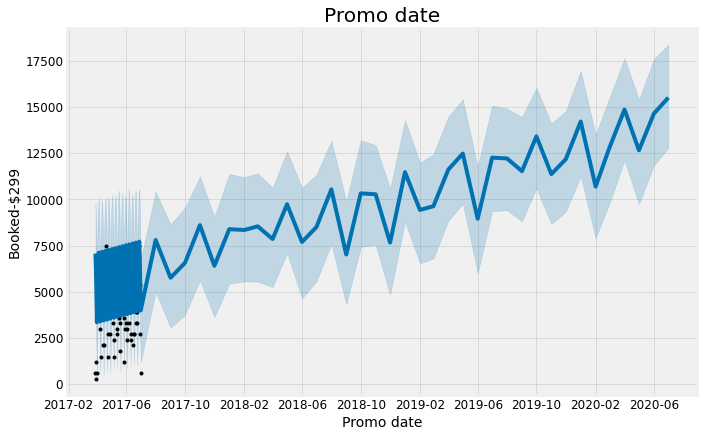

In [55]:
plt.figure(figsize=(18, 6))
price_199_model.plot(y_199_forecast, xlabel = 'Promo date', ylabel = 'Booked-$199')
price_299_model.plot(y_199_forecast, xlabel = 'Promo date', ylabel = 'Booked-$299')
plt.title('Promo date');

### 1.4 Establishing a Baseline
Establishing a baseline is one of the first steps that should be done in any machine learning
project. A baseline is a simple model we train in the data in order to determine accuracy and
compare to the real models we're going to try. This helps us determine whether the models
we try are actually providing any kind of improvements or not.  
One type of model that we can use as a baselines is called a dummy model. Dummy
models do not learn anything from the data, they just generate their decision by following a
rule that may or may not be related to the data. For example, a dummy model for our
problem here is one that outputs 0 or 1 at random with a 50% chance for each; this is an
example of a dummy rule that is not related to the data. Another dummy model is one that
always outputs the most frequent label in the training data; this dummy model is related to
the data, but it does not learn anything from it.  
These kinds of dummy models are provided in scikit-learn under the dummy module. All
of them are implemented in the DummyClassifier class, which accepts a strategy
parameter at initialization. This strategy parameter determines which rule the model is going
to use. Here, we're going to use the most_frequent strategy, which always returns the most
frequent label in the training data.



### Using a Dummy Classifier

As a first classifier, you can apply the built-in [`DummyClassifier` class from `sklearn.dummy`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) to set a baseline for performance of our future models.  This classifier does not actually use the feature matrix `X_digits_train`; classification decisions are made using the target vector `y_digits_train` only.  There are a few strategies, but we'll start with the `'most_frequent'` strategy.  That is, the `predict` method always returns the majority class. For our binary digit classification problem, this would be `-1` (because the `1` classification is reserved for `9`s and most of the digits are not `9`s).

In [56]:
y_199_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-03-29,5681.882863,4166.996624,9812.564522,5681.882863,5681.882863,1386.619304,1386.619304,1386.619304,1386.619304,1386.619304,1386.619304,0.0,0.0,0.0,7068.502168
1,2017-03-30,5688.979608,3378.116664,8993.191819,5688.979608,5688.979608,469.804196,469.804196,469.804196,469.804196,469.804196,469.804196,0.0,0.0,0.0,6158.783804
2,2017-03-31,5696.076353,1813.214054,7563.714430,5696.076353,5696.076353,-1029.795704,-1029.795704,-1029.795704,-1029.795704,-1029.795704,-1029.795704,0.0,0.0,0.0,4666.280649
3,2017-04-01,5703.173098,382.625060,6022.345251,5703.173098,5703.173098,-2358.824383,-2358.824383,-2358.824383,-2358.824383,-2358.824383,-2358.824383,0.0,0.0,0.0,3344.348714
4,2017-04-02,5710.269842,2322.686246,8246.266083,5710.269842,5710.269842,-436.347142,-436.347142,-436.347142,-436.347142,-436.347142,-436.347142,0.0,0.0,0.0,5273.922700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2020-03-01,13257.055361,9805.789063,15519.820305,13253.046321,13261.224811,-436.347142,-436.347142,-436.347142,-436.347142,-436.347142,-436.347142,0.0,0.0,0.0,12820.708218
127,2020-04-01,13476.929641,12104.591751,17640.771207,13472.656059,13481.239444,1386.619304,1386.619304,1386.619304,1386.619304,1386.619304,1386.619304,0.0,0.0,0.0,14863.548946
128,2020-05-01,13689.711203,9733.701323,15403.728124,13685.276777,13694.179429,-1029.795704,-1029.795704,-1029.795704,-1029.795704,-1029.795704,-1029.795704,0.0,0.0,0.0,12659.915499
129,2020-06-01,13909.585484,11837.848635,17594.222285,13904.935144,13914.284832,735.244700,735.244700,735.244700,735.244700,735.244700,735.244700,0.0,0.0,0.0,14644.830184


In [57]:
y_199_forecast.to_excel('trend_199.xls')

In [ ]:
y_299_forecast

In [ ]:
y_299_forecast.to_excel('trend_299.xls')

Having applied the `fit` method to the training data, you can use the `predict` method to see how this estimator classifies the data. Unsurprisingly, it returns a vector of all `-1`s (because that is the majority class for this data).

You can find the fraction of correct classifications using the method `score` with the test data:

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(y_199_forecast['ds'], y_199_forecast['trend'], 'b-')
plt.plot(y_199_forecast['ds'], y_199_forecast['trend'], 'r-')
plt.legend(); plt.xlabel('Promo date'); plt.ylabel('Booked')
plt.title('Booking trend for $199');

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(y_299_forecast['ds'], y_299_forecast['trend'], 'b-')
plt.plot(y_299_forecast['ds'], y_299_forecast['trend'], 'r-')
plt.legend(); plt.xlabel('Promo date'); plt.ylabel('Booked')
plt.title('Booking trend for $299');

Using `dummy.score` is equivalent to explicitly comparing the entries of `y_digits_pred` to `y_digits_test`, counting the number of correct classifications, and dividing by the number of classifications in total. 

For classification problems, a *confusion matrix* is a more detailed description of the accuracy of a classifier. It contains entries for the actual values as rows and predicted values as columns. This means we have:

| $~$ | **predicted  (-1)** | **predicted (+1)** |
| ---- | ----------- | ---------- |
| **actual (-1)** |  true negative | false positive |
| **actual (+1)** |  false negative | true positive |


The preceding definition generalizes to the multi-class classification problems as well.
In *Scikit-Learn*, the `confusion_matrix` function takes as arguments the actual labels followed by the predicted labels (labelled in ascending order according to the class labels). From the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):

> `sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)`
>
> Compute confusion matrix to evaluate the accuracy of a classification
>
> By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$.
>
> Thus in binary classification, the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$, and false positives is $C_{0,1}$.